In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset; max-height: unset; }</style>"))

In [2]:
file_path = 'Datasets/full_dataset.csv'
df = pd.read_csv(file_path)
df.shape

(3317242, 12)

In [3]:
df_train = pd.read_csv('Datasets/train_dataset.csv')
df_train.shape

(26000, 2)

In [4]:
df1 = df[~df['site'].isin(['regio7', 'diaridegirona', 'levante-emv', 'mallorcazeitung', 'farodevigo', 'laopinioncoruna'])]
keep_category = ["vida y estilo", "consumo", "activos", "decoracion", "actualidad", "futbol",
                  "internacional", "cultura", "nacional", "politica", "sociedad" , "economia", "cine", 
                  "ocio", "baloncesto", "gastronomia", "deportes", "ciencia", "motor", "tecnologia",
                  "salud", "esquelas", "belleza", "famosos", "television", "ocio y cultura"]
df1 = df1[df1['url_subsection'].isin(keep_category)]
df1 = df1[~df1['url'].str.contains('val.|amp')]
df1['length']= df1['body'].apply(lambda x: len(str(x).split()))
df1 = df1[(df1['length'] <=800) & (df1['length'] >=80)]
df1 = df1.drop_duplicates(subset=['body'])
df1.shape

(189627, 13)

In [7]:
df2 = df1[['body', 'url_subsection']].copy()
df2.rename(columns={'body': 'text', 'url_subsection': 'label'}, inplace=True)
df2['label'].value_counts()

label
sociedad          32027
deportes          23494
economia          19019
cultura           16280
politica          14397
television        14320
internacional     11354
nacional           9379
futbol             5387
activos            4205
ocio               4184
salud              3363
actualidad         3321
esquelas           3305
baloncesto         3226
vida y estilo      2920
decoracion         2683
motor              2584
famosos            2383
ocio y cultura     2202
ciencia            2112
tecnologia         1971
gastronomia        1911
belleza            1294
consumo            1197
cine               1109
Name: count, dtype: int64

In [9]:
df2 = df2[~df2['text'].isin(df_train['text'])]
df2['label'].value_counts()

label
sociedad          31051
deportes          22525
economia          18055
cultura           15318
politica          13444
television        13367
internacional     10408
nacional           8440
futbol             4489
activos            3326
ocio               3305
salud              2509
actualidad         2469
esquelas           2454
baloncesto         2378
vida y estilo      2081
decoracion         1850
motor              1761
famosos            1574
ocio y cultura     1411
ciencia            1326
tecnologia         1196
gastronomia        1142
belleza             602
consumo             523
cine                445
Name: count, dtype: int64

In [13]:
df2 = df2.groupby('label').apply(lambda x: x.sample(n=400, replace=True, random_state=1) if len(x) >= 400 else x).reset_index(drop=True)
df2['label'].value_counts()

label
activos           400
actualidad        400
television        400
tecnologia        400
sociedad          400
salud             400
politica          400
ocio y cultura    400
ocio              400
nacional          400
motor             400
internacional     400
gastronomia       400
futbol            400
famosos           400
esquelas          400
economia          400
deportes          400
decoracion        400
cultura           400
consumo           400
cine              400
ciencia           400
belleza           400
baloncesto        400
vida y estilo     400
Name: count, dtype: int64

In [14]:
new_file = 'Datasets/test_dataset.csv'
df2.to_csv(new_file, index=False)

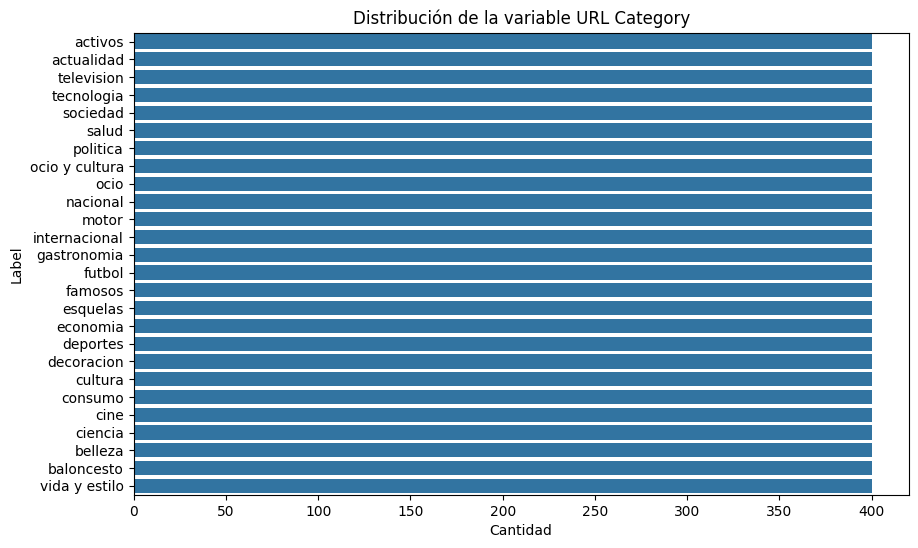

26

In [15]:

unique_url_category = df2['label'].nunique()
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df2, order = df2['label'].value_counts().index)
plt.title('Distribución de la variable URL Category')
plt.xlabel('Cantidad')
plt.ylabel('Label')
plt.show()
unique_url_category